# Computing Conditional Probability $P(a \mid b)$

We consider the task of computing $P(a \mid b)$, where $a$ can be a vector of features and $b$ can be a vector of features.

In a probabilistic view, this can be computed using:

$$
P(a \mid b) = \frac{P(a, b)}{P(b)}
$$

In Python, we can exploit the concepts of covariance to compute the conditional distribution of $a$ given $b$. Assuming that both $a$ and $b$ are jointly Gaussian-distributed (just for this example), the conditional distribution $P(a \mid b)$ is also Gaussian and can be computed using the conditional mean and covariance.

Given the joint mean vector and covariance matrix:
-  $\mu_1$ and $\Sigma_{11}$ are the mean and covariance of $a$,
-  $\mu_2$ and $\Sigma_{22}$ are the mean and covariance of $b$,
-  $\Sigma_{12}$ is the cross-covariance between $a$ and $b$,

The conditional distribution of $a$ given $b$ is Gaussian, with the following parameters:

### Conditional Mean:

$$
\mu_{a \mid b} = \mu_1 + \Sigma_{12} \Sigma_{22}^{-1} (b - \mu_2)
$$

### Conditional Covariance:

$$
\Sigma_{a \mid b} = \Sigma_{11} - \Sigma_{12} \Sigma_{22}^{-1} \Sigma_{12}^T
$$

This approach allows us to compute the conditional distribution $P(a \mid b)$ for multiple features, leveraging the covariance structure of the data.

Here’s a Python implementation of how this can be computed using NumPy:

In [11]:
import numpy as np

n_features = 10  # Total number of features in the dataset (for both a and b)
n_samples = 1000  # Total number of samples

# Define which indexes belong to a and b
a_indexes = np.array([0, 1, 2])  # Features for a (3 features)
b_indexes = np.array([3, 4, 5, 6])  # Features for b (4 features)

# Generate random data (n_features x n_samples)
data = np.random.rand(n_features, n_samples)

# Compute mean and covariance
mean = np.mean(data, axis=1)  # Mean across samples (axis=1 to get mean per feature)

cov = np.cov(data)  # Covariance matrix (n_features x n_features)

# Partition mean and covariance into a and b
mu_a = mean[a_indexes]  # Mean of a (3 features)
mu_b = mean[b_indexes]  # Mean of b (4 features)

Sigma_aa = cov[np.ix_(a_indexes, a_indexes)]  # Covariance of a (3x3 matrix)
Sigma_bb = cov[np.ix_(b_indexes, b_indexes)]  # Covariance of b (4x4 matrix)
Sigma_ab = cov[np.ix_(a_indexes, b_indexes)]  # Cross-covariance of a and b (3x4 matrix)

# Values of b (these should be the observed values of b)
b_values = np.array([1.0, 1.0, 1.0, 1.0])  # Example values for b (4 features)

# Compute conditional mean of a given b
mu_a_given_b = mu_a + Sigma_ab @ np.linalg.inv(Sigma_bb) @ (b_values - mu_b)

# Compute conditional covariance of a given b
Sigma_a_given_b = Sigma_aa - Sigma_ab @ np.linalg.inv(Sigma_bb) @ Sigma_ab.T

print(f"Conditional mean of a given b shape: {mu_a_given_b.shape}")
print(f"Conditional mean of a given b: {mu_a_given_b}")

print(f"Conditional covariance of a given b shape: {Sigma_a_given_b.shape}")
print(f"Conditional covariance of a given b: {Sigma_a_given_b}")


Conditional mean of a given b shape: (3,)
Conditional mean of a given b: [0.42317393 0.52931148 0.47197586]
Conditional covariance of a given b shape: (3, 3)
Conditional covariance of a given b: [[ 0.08372542 -0.00357772 -0.00916852]
 [-0.00357772  0.08034498  0.00857042]
 [-0.00916852  0.00857042  0.080072  ]]


In [13]:
import torch

n_features = 10  # Total number of features in the dataset (for both a and b)
n_samples = 1000  # Total number of samples

# Define which indexes belong to a and b
a_indexes = torch.tensor([0, 1, 2])  # Features for a (3 features)
b_indexes = torch.tensor([3, 4, 5, 6])  # Features for b (4 features)

# Generate random data (n_features x n_samples)
data = torch.rand(n_features, n_samples)

# Compute mean and covariance
mean = torch.mean(data, dim=1)  # Mean across samples (dim=1 to get mean per feature)

cov = torch.cov(data)  # Covariance matrix (n_features x n_features)

# Partition mean and covariance into a and b
mu_a = mean[a_indexes]  # Mean of a (3 features)
mu_b = mean[b_indexes]  # Mean of b (4 features)

Sigma_aa = cov[a_indexes][:, a_indexes]  # Covariance of a (3x3 matrix)
Sigma_bb = cov[b_indexes][:, b_indexes]  # Covariance of b (4x4 matrix)
Sigma_ab = cov[a_indexes][:, b_indexes]  # Cross-covariance of a and b (3x4 matrix)

# Values of b (these should be the observed values of b)
b_values = torch.tensor([1.0, 1.0, 1.0, 1.0])  # Example values for b (4 features)

# Compute conditional mean of a given b
inv_Sigma_bb = torch.inverse(Sigma_bb)  # Invert Sigma_bb
mu_a_given_b = mu_a + Sigma_ab @ inv_Sigma_bb @ (b_values - mu_b)

# Compute conditional covariance of a given b
Sigma_a_given_b = Sigma_aa - Sigma_ab @ inv_Sigma_bb @ Sigma_ab.T

print(f"Conditional mean of a given b shape: {mu_a_given_b.shape}")
print(f"Conditional mean of a given b: {mu_a_given_b}")

print(f"Conditional covariance of a given b shape: {Sigma_a_given_b.shape}")
print(f"Conditional covariance of a given b: {Sigma_a_given_b}")


Conditional mean of a given b shape: torch.Size([3])
Conditional mean of a given b: tensor([0.4870, 0.5252, 0.4341])
Conditional covariance of a given b shape: torch.Size([3, 3])
Conditional covariance of a given b: tensor([[ 0.0829, -0.0044, -0.0026],
        [-0.0044,  0.0847, -0.0031],
        [-0.0026, -0.0031,  0.0833]])


### General Explanation of Conditional Probability Density Plot for $ P(a_{i} \mid b) $

This explanation outlines how to compute and visualize the conditional probability density function (PDF) of a specific feature $ a_i $, given $ b $, when $ a $ and $b$ are continuous random variables. The process is based on the multivariate normal distribution, and the following steps explain how to compute the PDF and interpret the results.

#### 1. **Conditional Mean and Covariance for the Selected Feature**

Given a multivariate normal distribution, the conditional distribution of a subset of variables (e.g., the feature $ a_i $) given another set of variables (e.g., $ b $) can also be described by a normal distribution. The conditional distribution is parameterized by:
- **Conditional Mean** $ \mu_{a_i \mid b} $
- **Conditional Covariance** $ \Sigma_{a_i \mid b}$

For the selected feature $ a_i $, we extract the corresponding value from the conditional mean vector $ \mu_{a \mid b} $ and the variance from the diagonal of the conditional covariance matrix $ \Sigma_{a \mid b} $.

$$
\mu_{a_i \mid b} = \mu_{a \mid b}[i]
$$
$$
\Sigma_{a_i \mid b} = \Sigma_{a \mid b}[i, i]
$$

This provides the necessary parameters (mean and variance) for defining the univariate normal distribution for the selected feature $ a_i $.

#### 2. **Defining the Univariate Normal Distribution**

The conditional distribution of $ a_i $ given $ b $ follows a univariate normal distribution characterized by:
- **Mean**: $ \mu_{a_i \mid b} $
- **Standard Deviation**: $ \sigma_{a_i \mid b} = \sqrt{\Sigma_{a_i \mid b}} $

Thus, the distribution $ P(a_i \mid b) $ is:

$$
P(a_i \mid b) \sim \mathcal{N}(\mu_{a_i \mid b}, \sigma_{a_i \mid b}^2)
$$

#### 3. **Extracting the Range of Observed Data**

To effectively evaluate the PDF of $ P(a_i \mid b) $, we extract the actual range of observed values for $ a_i $ from the dataset. This range is defined by the minimum and maximum observed values of $ a_i $ in the data:

$$
\text{min}(a_i) = \min(\{a_i^{(1)}, a_i^{(2)}, \dots, a_i^{(n)}\})
$$
$$
\text{max}(a_i) = \max(\{a_i^{(1)}, a_i^{(2)}, \dots, a_i^{(n)}\})
$$

where $ \{a_i^{(1)}, a_i^{(2)}, \dots, a_i^{(n)}\} $ are the values of $ a_i $ across all samples.

#### 4. **Generating Values for $ a_i $**

Using the range of observed data, we generate a set of evenly spaced values for $ a_i $ between the minimum and maximum observed values:

$$
a_i \in [\text{min}(a_i), \text{max}(a_i)]
$$

These values will be used to evaluate the PDF at different points within the observed range of $ a_i $.

#### 5. **Evaluating the PDF**

For each value of $ a_i $ in the generated range, we compute the corresponding PDF value using the formula for the univariate normal distribution:

$$
P(a_i \mid b) = \frac{1}{\sqrt{2\pi \sigma_{a_i \mid b}^2}} \exp\left(-\frac{(a_i - \mu_{a_i \mid b})^2}{2\sigma_{a_i \mid b}^2}\right)
$$

This provides the probability density for each value of $a_i $ within the specified range.

#### 6. **Plotting the PDF**

The computed PDF values are then plotted, with the x-axis representing the values of $ a_i $ and the y-axis representing the corresponding probability densities. This plot illustrates how the probability density changes as $ a_i $ varies within the observed range of values.

The final plot visualizes the conditional distribution $ P(a_i \mid b) $, showing the likelihood of different values of $ a_i $ occurring given $ b $.

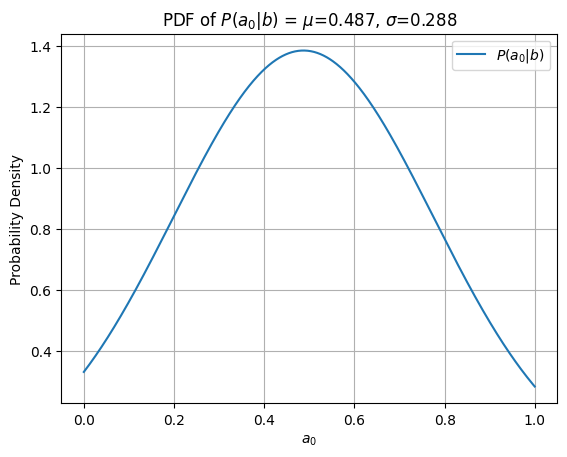

In [39]:
import torch
import matplotlib.pyplot as plt

# mu_a_given_b is the conditional mean (for continuous a)
# Sigma_a_given_b is the conditional covariance matrix
# data are the randomly generated data in the previous cell

feature_index = 0

# Select the mean and covariance for the first dimension of 'a'
mu_a1_given_b = mu_a_given_b[feature_index]  # First element of the conditional mean
Sigma_a1_given_b = Sigma_a_given_b[feature_index, feature_index]  # Variance of the first element (since it's a scalar)

# Define the normal distribution for the first dimension of 'a'
a1_dist = torch.distributions.Normal(mu_a1_given_b, torch.sqrt(Sigma_a1_given_b))

# Extract the data for the first feature of 'a' (index 0, since a_indexes = [0, 1, 2])
a1_data = data[feature_index, :]  # All values for the first feature across all samples

# Get the min and max from the actual data
min_a1 =  torch.min(a1_data)
max_a1 =  torch.max(a1_data)
n_points = len(a1_data)
# Generate values for 'a_1' between min and max
a1_values = torch.linspace(min_a1, max_a1, n_points)

# Evaluate the PDF at each value of 'a_1'
pdf_values_a1 = a1_dist.log_prob(a1_values).exp()  # Log-probabilities converted to probabilities

m = round(mu_a1_given_b.item(),3)
s = round(np.sqrt(Sigma_a1_given_b.item()), 3)

# Plot the PDF
plt.plot(a1_values.numpy(), pdf_values_a1.numpy(), label=f'$P(a_{feature_index}|b)$')
plt.title(f'PDF of $P(a_{feature_index}|b)$ = $\mu$={m}, $\sigma$={s}')
plt.xlabel(f'$a_{feature_index}$')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()

